In [ ]:
import os

# Add root directory to python path
import sys
from tqdm import tqdm
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

from src.cmesrc.utils import filepaths_updated_swan_data, read_SWAN_filepath

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn

In [2]:
SWAN = filepaths_updated_swan_data()


==CACHING SWAN DATA.==



100%|██████████| 4098/4098 [00:00<00:00, 1103296.60it/s]

In [ ]:
mean_dlons = []
mean_dlats = []
std_dlons = []
std_dlats = []
suspicious = []

for harpnum, filepath in tqdm(SWAN.items()):
    df = pd.read_csv(filepath, sep="\t")

    df["CENTRE_LON"] = (df["LONDTMIN"] + df["LONDTMAX"]) / 2
    df["CENTRE_LAT"] = (df["LATDTMIN"] + df["LATDTMAX"]) / 2

    diff_lon = np.diff(df["CENTRE_LON"])
    diff_lat = np.diff(df["CENTRE_LAT"])

    if np.any(np.any(np.where(np.abs(diff_lon) > 10)) or np.any(np.where(np.abs(diff_lon) > 1))):
        suspicious.append(harpnum)

    mean_dlons.append(np.nanmean(diff_lon))
    mean_dlats.append(np.nanmean(diff_lon))
    std_dlons.append(np.nanstd(diff_lon))
    std_dlats.append(np.nanstd(diff_lat))

In [ ]:
import seaborn as sns

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10,20), dpi=300)

sns.boxplot(std_dlons, ax = ax[0])
sns.boxplot(std_dlats, ax = ax[1])

In [ ]:
lon95p = np.nanpercentile(std_dlons, 99)
lon5p = np.nanpercentile(std_dlons, 0)

lat95p = np.nanpercentile(std_dlats, 99)
lat5p = np.nanpercentile(std_dlats, 0)

In [ ]:
lon_outliers = np.where(std_dlons > lon95p) or np.where(std_dlons < lon5p)
lon_outliers

In [ ]:
lat_outliers = np.where(std_dlats > lat95p) or np.where(std_dlats < lat5p)
lat_outliers

In [ ]:
harpnums = np.array(list(SWAN.keys()))
harpnums

In [ ]:
lon_outlier_harpnums = harpnums[lon_outliers[0]]
lon_outlier_harpnums

In [ ]:
lat_outlier_harpnums = harpnums[lat_outliers[0]]

In [ ]:
import shutil

for lon_outlier_harpnum in lon_outlier_harpnums:
    filepath = f"/home/julio/cmesrc/notebooks/figures/bboxes/{lon_outlier_harpnum}.png"

    new_filepath = f"/home/julio/cmesrc/notebooks/figures/bboxes/lon_outliers/{lon_outlier_harpnum}.png"

    shutil.copy(filepath, new_filepath)

for lat_outlier_harpnum in lat_outlier_harpnums:
    filepath = f"/home/julio/cmesrc/notebooks/figures/bboxes/{lat_outlier_harpnum}.png"

    new_filepath = f"/home/julio/cmesrc/notebooks/figures/bboxes/lat_outliers/{lat_outlier_harpnum}.png"

    shutil.copy(filepath, new_filepath)

for harpnum in suspicious:
    filepath = f"/home/julio/cmesrc/notebooks/figures/bboxes/{harpnum}.png"

    new_filepath = f"/home/julio/cmesrc/notebooks/figures/bboxes/suspicious/{harpnum}.png"

    shutil.copy(filepath, new_filepath)




In [ ]:
data = read_SWAN_filepath(SWAN[2114])

In [ ]:
londtmin, londtmax, latdtmin, latdtmax = data[['LONDTMIN', 'LONDTMAX', 'LATDTMIN', 'LATDTMAX']].values.T

Text(0.5, 0, 'Timestamp index')

<Figure size 350x262.5 with 0 Axes>

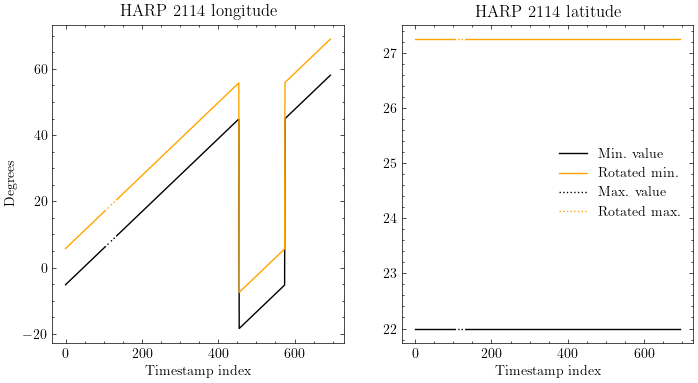

In [8]:
plt.style.use("science")

harpnum = 2114
data = read_SWAN_filepath(SWAN[harpnum])

plt.close()
plt.clf()

# A4 Width

width = 8.27

fig, ax = plt.subplots(1, 2, figsize=(width,0.5 * width))

X = np.arange(len(data), dtype=np.float64)
lon_min = data["LONDTMIN"].values
lon_max = data["LONDTMAX"].values
lat_min = data["LATDTMIN"].values
lat_max = data["LATDTMAX"].values
timestamps = data["Timestamp"].values

rotated_mask = data["IRBB"].values

original_x = np.copy(X)
original_lon_min = np.copy(lon_min)
original_lon_max = np.copy(lon_max)
original_lat_min = np.copy(lat_min)
original_lat_max = np.copy(lat_max)

original_x[rotated_mask] = np.nan
original_lon_min[rotated_mask] = np.nan
original_lon_max[rotated_mask] = np.nan
original_lat_min[rotated_mask] = np.nan
original_lat_max[rotated_mask] = np.nan

rotated_x = np.copy(X)
rotated_lon_min = np.copy(lon_min)
rotated_lon_max = np.copy(lon_max)
rotated_lat_min = np.copy(lat_min)
rotated_lat_max = np.copy(lat_max)

rotated_x[~rotated_mask] = np.nan
rotated_lon_min[~rotated_mask] = np.nan
rotated_lon_max[~rotated_mask] = np.nan
rotated_lat_min[~rotated_mask] = np.nan
rotated_lat_max[~rotated_mask] = np.nan

ax[0].plot(original_x, original_lon_min, color="black", linestyle="solid")
ax[0].plot(original_x, original_lon_max, color="orange", linestyle="solid")

ax[0].plot(rotated_x, rotated_lon_min, color="black", linestyle="dotted")
ax[0].plot(rotated_x, rotated_lon_max, color="orange", linestyle="dotted")

ax[0].set_title(f"HARP {harpnum} longitude")

ax[1].plot(original_x, original_lat_min, color="black", linestyle="solid")
ax[1].plot(original_x, original_lat_max, color="orange", linestyle="solid")

ax[1].plot(rotated_x, rotated_lat_min, color="black", linestyle="dotted")
ax[1].plot(rotated_x, rotated_lat_max, color="orange", linestyle="dotted")

ax[1].set_title(f"HARP {harpnum} latitude")

# Custom legend

# Need yellow solid line for max and black solid for min
# Need dotted versions for rotated

# Import mlines

import matplotlib.lines as mlines

# Create custom artists, make the two dotted lines be in the same legend label
black_line = mlines.Line2D([], [], color='black', linestyle="solid", label='Min. value')
orange_line = mlines.Line2D([], [], color='orange', linestyle="solid", label='Rotated min.')
dotted_black_line = mlines.Line2D([], [], color='black', linestyle="dotted", label='Max. value')
dotted_orange_line = mlines.Line2D([], [], color='orange', linestyle="dotted", label='Rotated max.')

# Create legend from custom artist/label lists
ax[1].legend(handles=[black_line, orange_line, dotted_black_line, dotted_orange_line])

ax[0].set_ylabel("Degrees")
ax[0].set_xlabel("Timestamp index")
ax[1].set_xlabel("Timestamp index")

In [ ]:
timestamps